<a href="https://colab.research.google.com/github/brainopensource/datascience-mvp/blob/ml-analytics-mvp/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics para conclusão da Sprint da Pós-Graduação em Ciência de Dados e Analytics (PUC Rio)

# Aluno Lucas da S. Rocha

## Introdução

Este notebook apresenta o desenvolvimento de um Mínimo Produto Viável (MVP) como parte do segundo módulo da Pós-Graduação em Ciência de Dados e Analytics da PUC-Rio. Utilizando dados abertos recentes sobre a produção de petróleo e gás no Brasil, disponibilizados pela Agência Nacional de Petróleo (ANP).

## Definição do Problema

O petróleo continua sendo um ativo estratégico no cenário energético global, afetado por fatores geopolíticos e pela volatilidade dos mercados internacionais. Nesse cenário, o Brasil se destaca como um dos principais produtores mundiais de petróleo e gás natural, tornando sua produção um tema relevante para análises e tomadas de decisão.

O objetivo deste trabalho é investigar a produção de petróleo e gás natural por poço, utilizando dados que abrangem o período de janeiro de 2020 até o primeiro semestre de 2024. Esse recorte captura as tendências mais recentes da indústria e nos permite explorar os fatores que influenciam a produtividade e a eficiência. A partir da aplicação de técnicas de ciência de dados, buscamos identificar padrões produtivos, anomalias e insights que possam otimizar a alocação de recursos e aumentar a eficiência e previsibilidade operacional e financeira.

A riqueza dos dados por poço oferece oportunidades significativas para análises detalhadas. Através de métodos estatísticos e, futuramente, de algoritmos de aprendizado de máquina, pretendemos explorar diversas aplicações, incluindo:    Análise de Eficiência da Produção, Geração de Curvas de Decaimento de Poços,    Classificação de Poços por Eficiência, Previsão da Produção Total por Campo e   Previsão de Royalties.

Essas análises iniciais geram insights valiosos para a gestão e a operação de poços e campos. O pré-processamento dos dados e a análise exploratória formam a base necessária para futuras implementações de machine learning, facilitando o desenvolvimento de modelos preditivos robustos e a criação de ferramentas analíticas que forneçam uma visão mais profunda das dinâmicas de produção. Isso permitirá, no futuro, decisões mais assertivas e embasadas no contexto da produção de petróleo e gás natural no Brasil, à medida que utilizaremos técnicas de aprendizado supervisionado em nosso estudo.


## Código do MVP

### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import hashlib
import warnings
import missingno as msno
import re

### Funções auxiliares

  Funções que serão úteis posteriormente no nosso MVP

In [2]:
# Função para gerar indice unico com hash
def hash_column(row, col1, col2, col3):
    """
    Gera um hash MD5 único para uma linha do DataFrame, combinando os valores
    de duas colunas especificadas.

    Args:
        row (pd.Series): A linha do DataFrame que contém os dados.
        col1 (str): O nome da primeira coluna a ser combinada.
        col2 (str): O nome da segunda coluna a ser combinada.

    Returns:
        str: Um hash MD5 gerado a partir dos valores combinados das duas colunas.
    """
    return hashlib.md5(f"{row[col1]}_{row[col2]}_{row[col3]}".encode()).hexdigest()

### Configuração do Ambiente

Configurações estéticas do pandas para limitar o máximo de linhas, colunas e filtrar avisos.

In [3]:
# Definindo o limite de exibição colunas de dataframe para None (sem limite)
pd.set_option('display.max_columns', 48)

# Definindo o limite de exibição de linhas de dataframe para 48
pd.set_option('display.max_rows', 48)

# Filter warnings
warnings.filterwarnings('ignore')

### Criando lista de URLs de datasets

Conforme sugerido, os dados foram disponibilizados publicamente no repositório do Github e lidos no formato Raw

[Link do Repositório](https://github.com/brainopensource/datascience-mvp)


In [4]:
url = "https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/main/datasets/monthly_production_concat/2015_2024_pre-salt_oil-gas-water_production.csv"
df_prod = pd.read_csv(url)
display(df_prod)

,unique_index,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tipo_instalacao,tempo_producao_hspormes,ano,mes
0,f52ac5c38305be3794a1e3c33b50ad2b,Rio de Janeiro,Campos,7-CRT-49-RJS,7CRT49RJS,BARRACUDA,Petrobras,480000038989755,2015-01-01,0.923630,0.0,0.923630,0.519151,0.0,0.519151,16.073501,0.003282,PETROBRAS 48,UEP,0,2015,1
1,cc08faf9143d9770b43d2397a717f377,Rio de Janeiro,Campos,4-RJS-265A-RJS,4RJS 0265A RJ,TRILHA,Trident Energy,480000037089718,2015-01-01,0.245571,0.0,0.245571,0.219449,0.0,0.219449,6.802927,0.000325,PETROBRAS 12,UEP,0,2015,1
2,e55d8086a27e1a06e121e376e2bb3cba,Espírito Santo,Campos,6-BRSA-639-ESS,6BFR1ESS,JUBARTE,Petrobras,480000035609749,2015-01-01,18.192739,0.0,18.192739,21.315999,0.0,21.315999,660.007324,0.396746,FPSO CAPIXABA,UEP,0,2015,1
3,2d024096b105949a88a78ab16c058057,São Paulo,Santos,1-BRSA-594-SPS,1SPS55,SAPINHOÁ,Petrobras,486100038842000,2015-01-01,17.314437,0.0,17.314437,20.607621,0.0,20.607621,388.864119,0.000000,FPSO CIDADE DE SÃO PAULO,UEP,0,2015,1
4,1560cdd99c05d21b8ec52e416d720760,São Paulo,Santos,3-BRSA-788-SPS,3SPS69,SAPINHOÁ,Petrobras,486100038842000,2015-01-01,29.542870,0.0,29.542870,37.472093,0.0,37.472093,707.095264,0.000000,FPSO CIDADE DE ILHA BELA,UEP,0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25786,cc361d1b58662dd4ecd85d55f34b1c89,Rio de Janeiro,Santos,9-BRSA-1284-RJS,9RJS730,ATAPU_ECO,Petrobras,48610012913201005,2024-06-01,13.917944,0.0,13.917944,17.154479,0.0,17.154479,49.562274,0.011662,Petrobras 70,UEP,355,2024,6
25787,357c26b51f31be6a37b515ed00f69a73,Rio de Janeiro,Santos,7-ATP-6-RJS,7ATP6RJS,ATAPU_ECO,Petrobras,48610012913201005,2024-06-01,24.884289,0.0,24.884289,40.381367,0.0,40.381367,116.668857,0.020891,Petrobras 70,UEP,355,2024,6
25788,614e811a8aaf9fc456dcdaca40ec3fae,Rio de Janeiro,Santos,1-BRSA-1146-RJS,1RJS711,ATAPU_ECO,Petrobras,48610012913201005,2024-06-01,2.134739,0.0,2.134739,3.647567,0.0,3.647567,10.538436,0.001736,Petrobras 70,UEP,322,2024,6
25789,ab2416fb04a6e8fd93015c360a7ac01a,Rio de Janeiro,Santos,7-OATP-1-RJS,7OATP1RJS,ATAPU_ECO,Petrobras,486100038862000,2024-06-01,13.409740,0.0,13.409740,16.709655,0.0,16.709655,48.277137,0.014381,Petrobras 70,UEP,356,2024,6


### Transformações de dado

In [24]:
print(df_prod.dtypes)

# Exibir o resultado
print('before', df_prod.columns)

# Substituir acentos e espaços por underscore usando apenas regex
#df_prod.columns = [re.sub(r'[^\w]', '_', col) for col in df_prod.columns]

# Filtrando o DataFrame para o campo MERO
df_campo = df_prod[df_prod['campo'] == 'SUL DE TUPI']

# Obtendo o valor mínimo e máximo de uma coluna específica, por exemplo 'periodo'
min_periodo = df_campo['periodo'].min()
max_periodo = df_campo['periodo'].max()

# Exibindo os valores
print(f"Período mínimo: {min_periodo}")
print(f"Período máximo: {max_periodo}")

display(df_campo.sort_values(by='periodo'))

periodo                       datetime64[ns]
nome_poco_anp                         object
oleo_kbd                             float64
condensado_kbd                       float64
petroleo_kbd                         float64
gas_natural_mmscf_assoc              float64
gas_natural_mmscf_nassoc             float64
gas_natural_mmscf_total              float64
volume_gas_royalties_mmscf           float64
agua_kbd                             float64
estado                                object
bacia                                 object
campo                                 object
operador                              object
numero_contrato                       object
tempo_producao_hspormes                int64
ano                                    int64
mes                                    int64
dias_no_mes                            int32
producao_total_mes                   float64
producao_acumulada                   float64
instalacao_destino                    object
tipo_insta

,periodo,nome_poco_anp,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,estado,bacia,campo,operador,numero_contrato,tempo_producao_hspormes,ano,mes,dias_no_mes,producao_total_mes,producao_acumulada,instalacao_destino,tipo_instalacao,nome_poco_operador,unique_index
4887,2019-02-01,4-BRSA-1047-RJS,11.061288,0.0,11.061288,12.098696,0.0,12.098696,0.000000,0.000000,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,48610012913201005,290,2019,2,28,309.716050,309.716050,Petrobras 69,UEP,4RJS698,404cb5f2cffa5df70fd4e01f4ccb4a86
5084,2019-03-01,4-BRSA-1047-RJS,23.378334,0.0,23.378334,26.939268,0.0,26.939268,471.263521,0.000000,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,48610012913201005,735,2019,3,31,724.728357,1034.444407,Petrobras 69,UEP,4RJS698,ea9efd9529d2db579ccb384d54fefd5c
5285,2019-04-01,7-LL-48D-RJS,0.093283,0.0,0.093283,0.118343,0.0,0.118343,1.717675,0.000000,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,31,2019,4,30,2.798490,24029.184772,FPSO CIDADE DE MARICÁ,UEP,7LL48DRJS,f906e074aaf3d97c82a510ef765437f7
5286,2019-04-01,7-LL-60D-RJS,1.625526,0.0,1.625526,3.017874,0.0,3.017874,43.802473,0.000000,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,640,2019,4,30,48.765780,13183.414895,Petrobras 66 (P-66),UEP,7LL60DRJS,a94e54d05c3372bdee6ab958bce5e336
5287,2019-04-01,7-LL-66-RJS,1.959409,0.0,1.959409,2.319205,0.0,2.319205,33.661744,0.000000,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,637,2019,4,30,58.782276,14023.726051,FPSO CIDADE DE MARICÁ,UEP,7LL66RJS,d8e0b20200dc044c2846de2c82556370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25528,2024-06-01,7-LL-59-RJS,1.234775,0.0,1.234775,2.312424,0.0,2.312424,29.291389,0.038143,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,654,2024,6,30,37.043256,41203.811890,FPSO CIDADE DE SAQUAREMA,UEP,7LL59RJS,b3f096d8e6c464473d81b475db885ca6
25529,2024-06-01,7-LL-11-RJS,0.358007,0.0,0.358007,1.081333,0.0,1.081333,13.697195,0.678833,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,608,2024,6,30,10.740204,21439.491480,FPSO CIDADE DE PARATY,UEP,7LL11RJS,4a2ff074810f80bc744dc9a057ab78e9
25530,2024-06-01,7-LL-119D-RJS,1.573171,0.0,1.573171,3.031516,0.0,3.031516,38.400075,0.024983,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,634,2024,6,30,47.195130,23954.774366,FPSO CIDADE DE PARATY,UEP,7LL119DRJS,51c6d8b65016a817347177d5843b6b62
25532,2024-06-01,7-TUP-120D-RJS,0.029116,0.0,0.029116,0.040142,0.0,0.040142,0.508461,0.000152,Rio de Janeiro,Santos,SUL DE TUPI,Petrobras,486100038862000,12,2024,6,30,0.873477,6481.771617,FPSO CIDADE DE PARATY,UEP,7-TUP-120D-RJS,d82fad2d0890ad89fd27d8740109d507


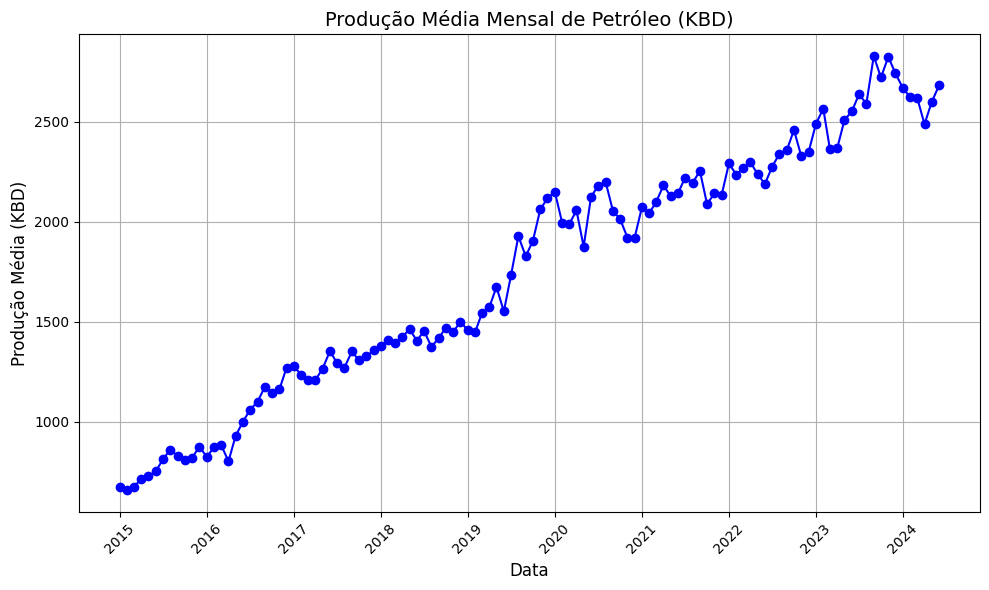

In [6]:
# Certifique-se de que a coluna 'periodo' está em formato datetime
df_prod['periodo'] = pd.to_datetime(df_prod['periodo'], format='%Y-%m-%d')

# Agrupar por ano e mês, somando a produção média diária em KBD (mil barris por dia)
df_grouped = df_prod.groupby(df_prod['periodo'].dt.to_period('M')).agg(producao_media_kbd=('petroleo_kbd', 'sum')).reset_index()

# Convertendo a coluna 'periodo' de volta para datetime (primeiro dia do mês) para fins de plotagem
df_grouped['periodo'] = df_grouped['periodo'].dt.to_timestamp()

# Plotar o gráfico da produção média em KBD ao longo dos meses
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['periodo'], df_grouped['producao_media_kbd'], marker='o', linestyle='-', color='b')

# Adicionar títulos e labels
plt.title('Produção Média Mensal de Petróleo (KBD)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Produção Média (KBD)', fontsize=12)

# Exibir o gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Curvas Acumuladas

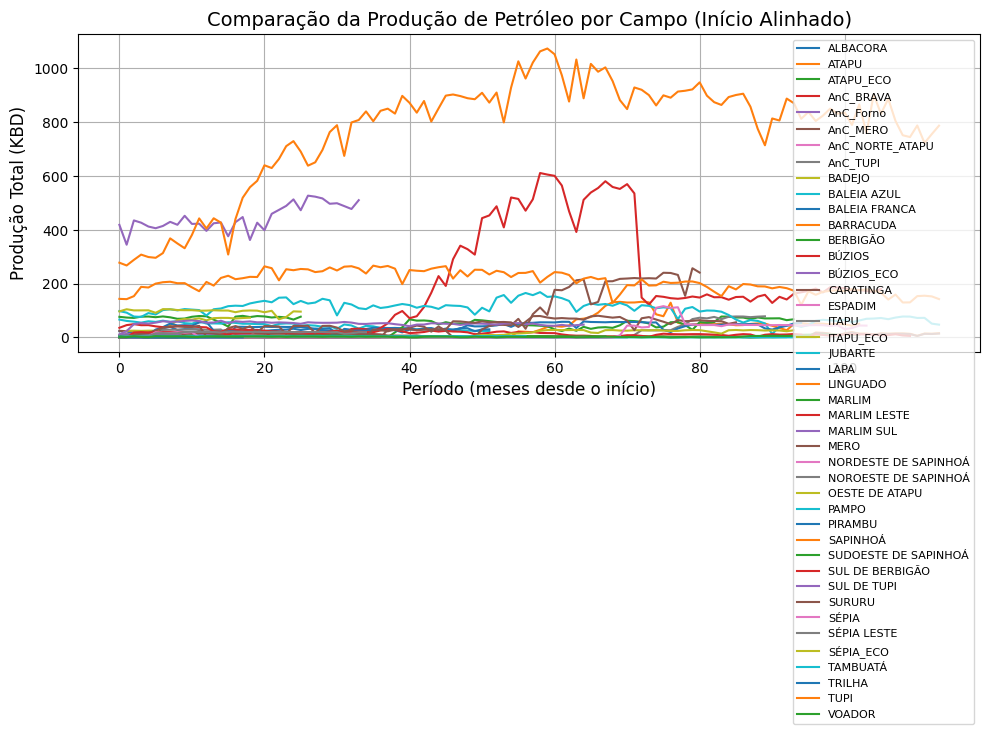

In [7]:
# Agrupar por campo e obter a produção total por mês
df_grouped = df_prod.groupby(['campo', df_prod['periodo'].dt.to_period('M')]).agg(producao_total_kbd=('petroleo_kbd', 'sum')).reset_index()

# Dicionário para armazenar a produção de cada campo, redefinindo o tempo (X=0 para todos)
campos_producao = {}

# Iterar sobre cada campo e redefinir o tempo (indexar a partir de 0)
for campo in df_grouped['campo'].unique():
    campo_df = df_grouped[df_grouped['campo'] == campo]
    campo_df = campo_df.reset_index(drop=True)
    campos_producao[campo] = campo_df['producao_total_kbd'].values

# Plotar todos os campos, começando de X=0
plt.figure(figsize=(10, 6))

for campo, producao in campos_producao.items():
    plt.plot(range(len(producao)), producao, label=campo)

# Adicionar título e labels
plt.title('Comparação da Produção de Petróleo por Campo (Início Alinhado)', fontsize=14)
plt.xlabel('Período (meses desde o início)', fontsize=12)
plt.ylabel('Produção Total (KBD)', fontsize=12)

# Adicionar legenda
plt.legend(loc='upper right', fontsize=8)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


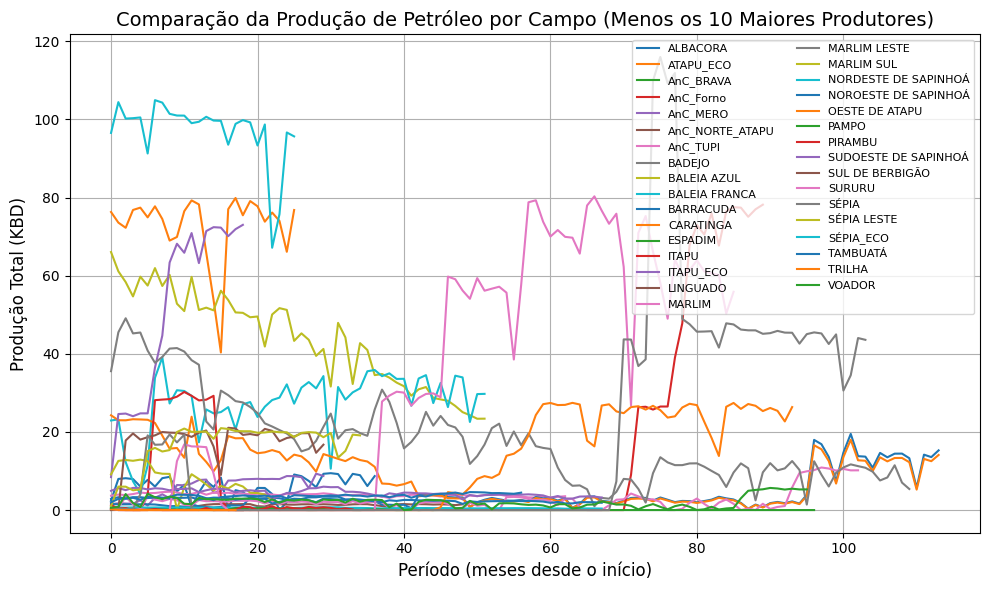

In [8]:
# Agrupar por campo para calcular a produção total de cada campo
producao_total_por_campo = df_prod.groupby('campo')['petroleo_kbd'].sum().sort_values(ascending=False)

# Obter os 10 maiores produtores
maiores_produtores = producao_total_por_campo.head(10).index

# Filtrar os dados removendo os 10 maiores produtores
df_filtrado = df_prod[~df_prod['campo'].isin(maiores_produtores)]

# Agrupar por campo e obter a produção total por mês para os campos restantes
df_grouped = df_filtrado.groupby(['campo', df_filtrado['periodo'].dt.to_period('M')]).agg(producao_total_kbd=('petroleo_kbd', 'sum')).reset_index()

# Dicionário para armazenar a produção de cada campo, redefinindo o tempo (X=0 para todos)
campos_producao = {}

# Iterar sobre cada campo e redefinir o tempo (indexar a partir de 0)
for campo in df_grouped['campo'].unique():
    campo_df = df_grouped[df_grouped['campo'] == campo]
    campo_df = campo_df.reset_index(drop=True)
    campos_producao[campo] = campo_df['producao_total_kbd'].values

# Plotar todos os campos, começando de X=0 (exceto os 10 maiores produtores)
plt.figure(figsize=(10, 6))

for campo, producao in campos_producao.items():
    plt.plot(range(len(producao)), producao, label=campo)

# Adicionar título e labels
plt.title('Comparação da Produção de Petróleo por Campo (Menos os 10 Maiores Produtores)', fontsize=14)
plt.xlabel('Período (meses desde o início)', fontsize=12)
plt.ylabel('Produção Total (KBD)', fontsize=12)

# Adicionar legenda
plt.legend(loc='upper right', fontsize=8, ncol=2)  # ncol ajusta o número de colunas na legenda

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


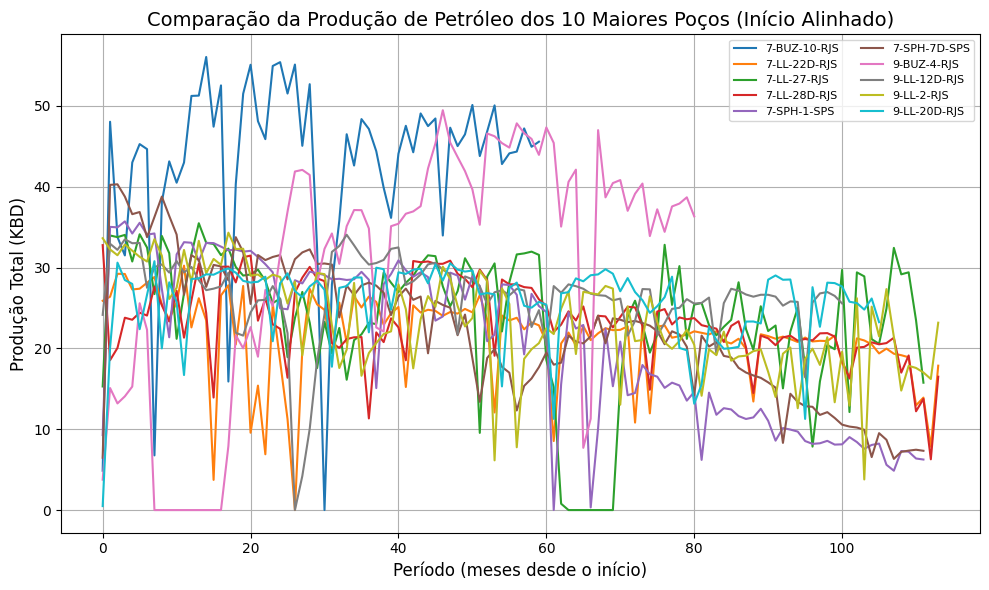

In [9]:
# Agrupar por poço para calcular a produção total de cada poço
producao_total_por_poco = df_prod.groupby('nome_poco_anp')['petroleo_kbd'].sum().sort_values(ascending=False)

# Obter os 10 maiores poços produtores
maiores_pocos = producao_total_por_poco.head(10).index

# Filtrar os dados para apenas os 10 maiores poços
df_filtrado = df_prod[df_prod['nome_poco_anp'].isin(maiores_pocos)]

# Agrupar por poço e período para obter a produção total por mês dos 10 maiores poços
df_grouped = df_filtrado.groupby(['nome_poco_anp', df_filtrado['periodo'].dt.to_period('M')]).agg(producao_total_kbd=('petroleo_kbd', 'sum')).reset_index()

# Dicionário para armazenar a produção de cada poço, redefinindo o tempo (X=0 para todos)
pocos_producao = {}

# Iterar sobre cada poço e redefinir o tempo (indexar a partir de 0)
for poco in df_grouped['nome_poco_anp'].unique():
    poco_df = df_grouped[df_grouped['nome_poco_anp'] == poco]
    poco_df = poco_df.reset_index(drop=True)
    pocos_producao[poco] = poco_df['producao_total_kbd'].values

# Plotar os 10 maiores poços, começando de X=0
plt.figure(figsize=(10, 6))

for poco, producao in pocos_producao.items():
    plt.plot(range(len(producao)), producao, label=poco)

# Adicionar título e labels
plt.title('Comparação da Produção de Petróleo dos 10 Maiores Poços (Início Alinhado)', fontsize=14)
plt.xlabel('Período (meses desde o início)', fontsize=12)
plt.ylabel('Produção Total (KBD)', fontsize=12)

# Adicionar legenda
plt.legend(loc='upper right', fontsize=8, ncol=2)  # ncol ajusta o número de colunas na legenda

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
print(df_prod.dtypes)

unique_index                          object
estado                                object
bacia                                 object
nome_poco_anp                         object
nome_poco_operador                    object
campo                                 object
operador                              object
numero_contrato                       object
periodo                       datetime64[ns]
oleo_kbd                             float64
condensado_kbd                       float64
petroleo_kbd                         float64
gas_natural_mmscf_assoc              float64
gas_natural_mmscf_nassoc             float64
gas_natural_mmscf_total              float64
volume_gas_royalties_mmscf           float64
agua_kbd                             float64
instalacao_destino                    object
tipo_instalacao                       object
tempo_producao_hspormes                int64
ano                                    int64
mes                                    int64
dtype: obj

In [11]:
# Calcular o número de dias no mês
df_prod['dias_no_mes'] = df_prod['periodo'].dt.days_in_month

# Calcular a produção total no mês (média diária * número de dias no mês)
df_prod['producao_total_mes'] = df_prod['petroleo_kbd'] * df_prod['dias_no_mes']

# Agora, agrupar por poço e calcular a produção acumulada ao longo do tempo
df_prod['producao_acumulada'] = df_prod.groupby('nome_poco_anp')['producao_total_mes'].cumsum()

In [12]:
# Definindo a nova ordem das colunas
colunas_ordenadas = [
    'periodo', 'nome_poco_anp', 'oleo_kbd', 'condensado_kbd', 'petroleo_kbd',
    'gas_natural_mmscf_assoc', 'gas_natural_mmscf_nassoc', 'gas_natural_mmscf_total',
    'volume_gas_royalties_mmscf', 'agua_kbd', 'estado', 'bacia', 'campo', 'operador',
    'numero_contrato', 'tempo_producao_hspormes', 'ano', 'mes', 'dias_no_mes',
    'producao_total_mes', 'producao_acumulada', 'instalacao_destino', 'tipo_instalacao',
    'nome_poco_operador', 'unique_index'
]

# Reorganizando as colunas do DataFrame
df_prod = df_prod[colunas_ordenadas]

# Verificando a nova ordem das colunas
df_prod.head()

,periodo,nome_poco_anp,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,estado,bacia,campo,operador,numero_contrato,tempo_producao_hspormes,ano,mes,dias_no_mes,producao_total_mes,producao_acumulada,instalacao_destino,tipo_instalacao,nome_poco_operador,unique_index
0,2015-01-01,7-CRT-49-RJS,0.923630,0.0,0.923630,0.519151,0.0,0.519151,16.073501,0.003282,Rio de Janeiro,Campos,BARRACUDA,Petrobras,480000038989755,0,2015,1,31,28.632527,28.632527,PETROBRAS 48,UEP,7CRT49RJS,f52ac5c38305be3794a1e3c33b50ad2b
1,2015-01-01,4-RJS-265A-RJS,0.245571,0.0,0.245571,0.219449,0.0,0.219449,6.802927,0.000325,Rio de Janeiro,Campos,TRILHA,Trident Energy,480000037089718,0,2015,1,31,7.612707,7.612707,PETROBRAS 12,UEP,4RJS 0265A RJ,cc08faf9143d9770b43d2397a717f377
2,2015-01-01,6-BRSA-639-ESS,18.192739,0.0,18.192739,21.315999,0.0,21.315999,660.007324,0.396746,Espírito Santo,Campos,JUBARTE,Petrobras,480000035609749,0,2015,1,31,563.974897,563.974897,FPSO CAPIXABA,UEP,6BFR1ESS,e55d8086a27e1a06e121e376e2bb3cba
3,2015-01-01,1-BRSA-594-SPS,17.314437,0.0,17.314437,20.607621,0.0,20.607621,388.864119,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,536.747559,536.747559,FPSO CIDADE DE SÃO PAULO,UEP,1SPS55,2d024096b105949a88a78ab16c058057
4,2015-01-01,3-BRSA-788-SPS,29.542870,0.0,29.542870,37.472093,0.0,37.472093,707.095264,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,915.828979,915.828979,FPSO CIDADE DE ILHA BELA,UEP,3SPS69,1560cdd99c05d21b8ec52e416d720760


### Curvas Acumuladas

In [13]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_prod.groupby('campo')['oleo_kbd'].sum().nlargest(6).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_prod[df_prod['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhares de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Convertendo o índice para datetime, caso não esteja no formato correto
df_acumulado.index = pd.to_datetime(df_acumulado.index)

# Agora, filtrar apenas o primeiro mês de cada ano
df_acumulado_ano = df_acumulado[df_acumulado.index.month == 1]

# Filtrar para remover 2015 e 2016
df_acumulado_ano = df_acumulado_ano[df_acumulado_ano.index.year >= 2015]

# Garantir que o índice esteja no formato datetime
df_acumulado.index = pd.to_datetime(df_acumulado.index)

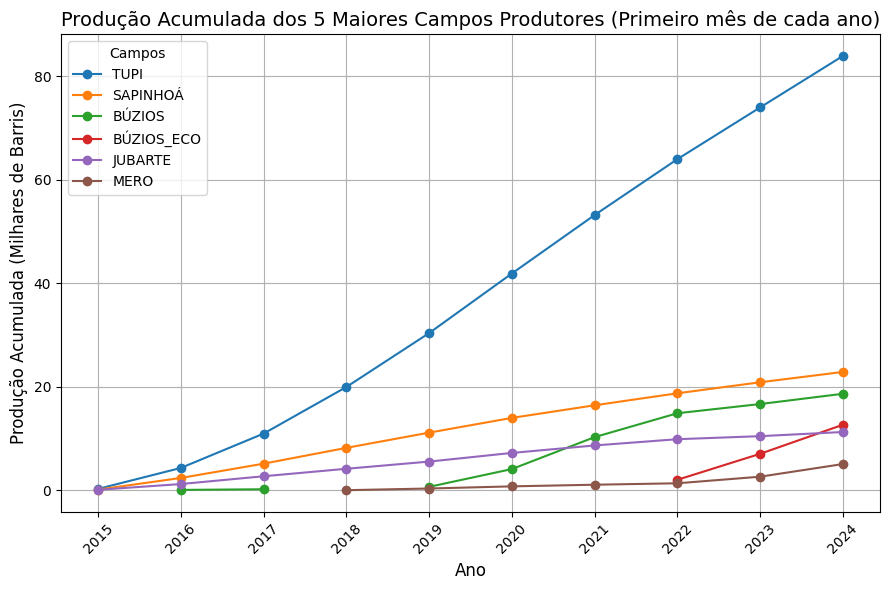

In [14]:
# Criar gráfico de linhas para a produção acumulada
plt.figure(figsize=(9, 6))

# Plotar cada linha para os 5 maiores produtores
for campo in maiores_produtores:
    plt.plot(df_acumulado_ano.index, df_acumulado_ano[campo], label=campo, marker='o')

# Configurações do gráfico
plt.title('Produção Acumulada dos 6 Maiores Campos Produtores (Primeiro mês de cada ano)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Produção Acumulada (Milhares de Barris)', fontsize=12)

# Ajustar o eixo X para mostrar as datas corretamente
plt.xticks(ticks=df_acumulado_ano.index, labels=df_acumulado_ano.index.year, rotation=45)

# Adicionar grade e legenda
plt.grid(True)
plt.legend(title='Campos', loc='upper left')

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [15]:
display(df_acumulado_ano)
print(df_acumulado_ano.dtypes)

,TUPI,SAPINHOÁ,BÚZIOS,BÚZIOS_ECO,JUBARTE,MERO
periodo,,,,,,
2015-01-01,0.277555,0.143081,NaN,NaN,0.097627,NaN
2016-01-01,4.324285,2.389276,0.081554,NaN,1.215072,NaN
2017-01-01,10.972669,5.153021,0.207417,NaN,2.720256,NaN
2018-01-01,19.968495,8.205628,NaN,NaN,4.165312,0.026431
2019-01-01,30.375453,11.143552,0.676582,NaN,5.552213,0.351708
2020-01-01,41.879791,13.989816,4.103285,NaN,7.223901,0.765100
2021-01-01,53.193344,16.431717,10.283730,NaN,8.669690,1.083877
2022-01-01,63.977824,18.747464,14.893431,2.035763,9.876405,1.360782
2023-01-01,73.964887,20.875323,16.666562,7.050901,10.462594,2.632207


TUPI          float64
SAPINHOÁ      float64
BÚZIOS        float64
BÚZIOS_ECO    float64
JUBARTE       float64
MERO          float64
dtype: object


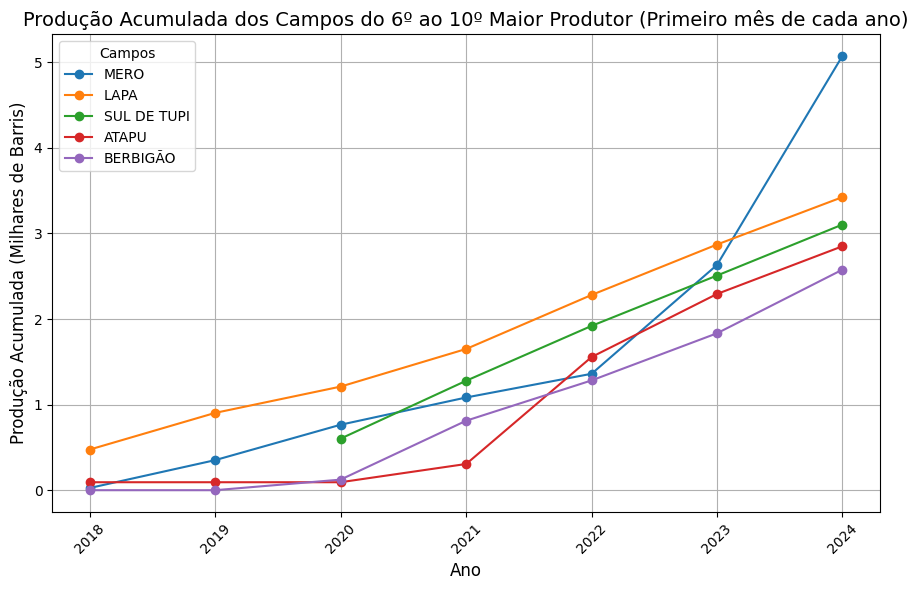

In [16]:
# Encontrar os 10 maiores produtores (do 1º ao 10º)
maiores_produtores = df_prod.groupby('campo')['oleo_kbd'].sum().nlargest(10).index.tolist()

# Selecionar os produtores do 6º ao 10º lugar
campos_5_ao_10 = maiores_produtores[5:10]  # Pega os campos da posição 6 à 10

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

# Filtrar e agrupar os dados para os campos selecionados
for campo in campos_5_ao_10:
    # Filtrar dados para o campo atual
    df_campo = df_prod[df_prod['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhares de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Convertendo o índice para datetime, caso não esteja no formato correto
df_acumulado.index = pd.to_datetime(df_acumulado.index)

# Agora, filtrar apenas o primeiro mês de cada ano
df_acumulado_ano = df_acumulado[df_acumulado.index.month == 1]

# Filtrar para remover 2015 e 2016
df_acumulado_ano = df_acumulado_ano[df_acumulado_ano.index.year >= 2015]

# Criar gráfico de linhas para a produção acumulada
plt.figure(figsize=(9, 6))

# Plotar cada linha para os campos de 5º a 10º maior produtor
for campo in campos_5_ao_10:
    plt.plot(df_acumulado_ano.index, df_acumulado_ano[campo], label=campo, marker='o')

# Configurações do gráfico
plt.title('Produção Acumulada dos Campos do 6º ao 10º Maior Produtor (Primeiro mês de cada ano)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Produção Acumulada (Milhares de Barris)', fontsize=12)

# Ajustar o eixo X para mostrar os anos corretamente
plt.xticks(ticks=df_acumulado_ano.index, labels=df_acumulado_ano.index.year, rotation=45)

# Adicionar grade e legenda
plt.grid(True)
plt.legend(title='Campos', loc='upper left')

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [19]:
display(df_acumulado)
display(df_prod)

,MERO,LAPA,SUL DE TUPI,ATAPU,BERBIGÃO
periodo,,,,,
2017-10-01,0.000651,0.397004,NaN,0.093604,0.000590
2017-11-01,0.002167,0.397004,NaN,0.093604,0.000590
2017-12-01,0.012866,0.436344,NaN,0.093604,0.000590
2018-01-01,0.026431,0.475584,NaN,0.093604,0.000590
2018-02-01,0.042749,0.513903,NaN,NaN,NaN
...,...,...,...,...,...
2024-02-01,5.312304,3.453397,3.146648,2.898497,2.647188
2024-03-01,5.544350,3.490331,3.193078,2.948229,2.717708
2024-04-01,5.698672,3.533405,3.235738,2.996561,2.788559


,periodo,nome_poco_anp,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,estado,bacia,campo,operador,numero_contrato,tempo_producao_hspormes,ano,mes,dias_no_mes,producao_total_mes,producao_acumulada,instalacao_destino,tipo_instalacao,nome_poco_operador,unique_index
0,2015-01-01,7-CRT-49-RJS,0.923630,0.0,0.923630,0.519151,0.0,0.519151,16.073501,0.003282,Rio de Janeiro,Campos,BARRACUDA,Petrobras,480000038989755,0,2015,1,31,28.632527,28.632527,PETROBRAS 48,UEP,7CRT49RJS,f52ac5c38305be3794a1e3c33b50ad2b
1,2015-01-01,4-RJS-265A-RJS,0.245571,0.0,0.245571,0.219449,0.0,0.219449,6.802927,0.000325,Rio de Janeiro,Campos,TRILHA,Trident Energy,480000037089718,0,2015,1,31,7.612707,7.612707,PETROBRAS 12,UEP,4RJS 0265A RJ,cc08faf9143d9770b43d2397a717f377
2,2015-01-01,6-BRSA-639-ESS,18.192739,0.0,18.192739,21.315999,0.0,21.315999,660.007324,0.396746,Espírito Santo,Campos,JUBARTE,Petrobras,480000035609749,0,2015,1,31,563.974897,563.974897,FPSO CAPIXABA,UEP,6BFR1ESS,e55d8086a27e1a06e121e376e2bb3cba
3,2015-01-01,1-BRSA-594-SPS,17.314437,0.0,17.314437,20.607621,0.0,20.607621,388.864119,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,536.747559,536.747559,FPSO CIDADE DE SÃO PAULO,UEP,1SPS55,2d024096b105949a88a78ab16c058057
4,2015-01-01,3-BRSA-788-SPS,29.542870,0.0,29.542870,37.472093,0.0,37.472093,707.095264,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,915.828979,915.828979,FPSO CIDADE DE ILHA BELA,UEP,3SPS69,1560cdd99c05d21b8ec52e416d720760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25786,2024-06-01,9-BRSA-1284-RJS,13.917944,0.0,13.917944,17.154479,0.0,17.154479,49.562274,0.011662,Rio de Janeiro,Santos,ATAPU_ECO,Petrobras,48610012913201005,355,2024,6,30,417.538326,20043.455465,Petrobras 70,UEP,9RJS730,cc361d1b58662dd4ecd85d55f34b1c89
25787,2024-06-01,7-ATP-6-RJS,24.884289,0.0,24.884289,40.381367,0.0,40.381367,116.668857,0.020891,Rio de Janeiro,Santos,ATAPU_ECO,Petrobras,48610012913201005,355,2024,6,30,746.528679,53854.533387,Petrobras 70,UEP,7ATP6RJS,357c26b51f31be6a37b515ed00f69a73
25788,2024-06-01,1-BRSA-1146-RJS,2.134739,0.0,2.134739,3.647567,0.0,3.647567,10.538436,0.001736,Rio de Janeiro,Santos,ATAPU_ECO,Petrobras,48610012913201005,322,2024,6,30,64.042155,16847.341418,Petrobras 70,UEP,1RJS711,614e811a8aaf9fc456dcdaca40ec3fae
25789,2024-06-01,7-OATP-1-RJS,13.409740,0.0,13.409740,16.709655,0.0,16.709655,48.277137,0.014381,Rio de Janeiro,Santos,ATAPU_ECO,Petrobras,486100038862000,356,2024,6,30,402.292209,14501.888962,Petrobras 70,UEP,7OATP1RJS,ab2416fb04a6e8fd93015c360a7ac01a


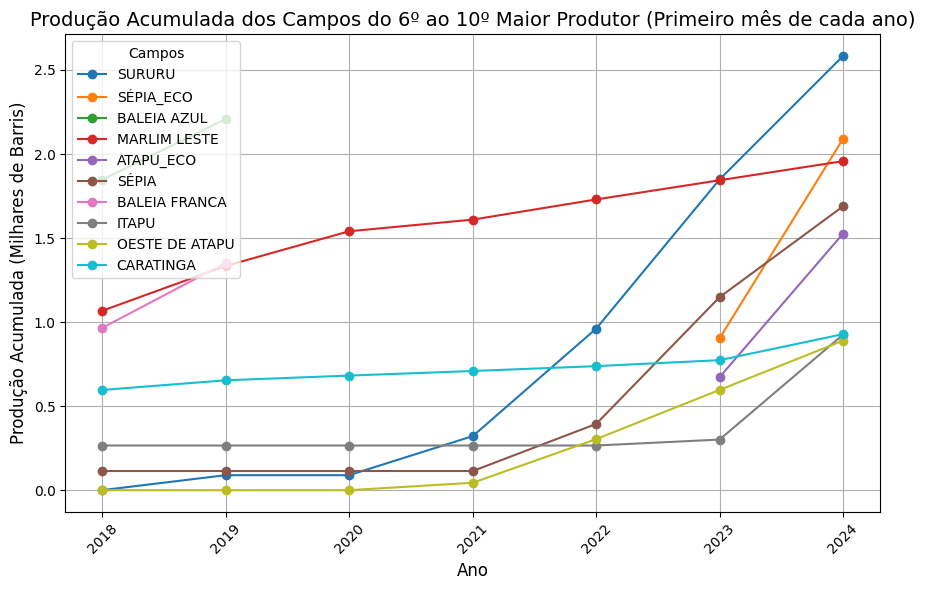

In [27]:
# Encontrar os 10 maiores produtores (do 1º ao 20º)
maiores_produtores = df_prod.groupby('campo')['oleo_kbd'].sum().nlargest(20).index.tolist()

# Selecionar os produtores do 5º ao 10º lugar
campos_10_ao_20 = maiores_produtores[10:20]  # Pega os campos da posição 10 à 20

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

# Filtrar e agrupar os dados para os campos selecionados
for campo in campos_10_ao_20:
    # Filtrar dados para o campo atual
    df_campo = df_prod[df_prod['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhares de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Convertendo o índice para datetime, caso não esteja no formato correto
df_acumulado.index = pd.to_datetime(df_acumulado.index)

# Agora, filtrar apenas o primeiro mês de cada ano
df_acumulado_ano = df_acumulado[df_acumulado.index.month == 1]

# Filtrar para remover 2015 e 2016
df_acumulado_ano = df_acumulado_ano[df_acumulado_ano.index.year >= 2015]

# Criar gráfico de linhas para a produção acumulada
plt.figure(figsize=(9, 6))

# Plotar cada linha para os campos de 5º a 10º maior produtor
for campo in campos_10_ao_20:
    plt.plot(df_acumulado_ano.index, df_acumulado_ano[campo], label=campo, marker='o')

# Configurações do gráfico
plt.title('Produção Acumulada dos Campos do 11º ao 20º Maior Produtor (Primeiro mês de cada ano)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Produção Acumulada (Milhares de Barris)', fontsize=12)

# Ajustar o eixo X para mostrar os anos corretamente
plt.xticks(ticks=df_acumulado_ano.index, labels=df_acumulado_ano.index.year, rotation=45)

# Adicionar grade e legenda
plt.grid(True)
plt.legend(title='Campos', loc='upper left')

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()


### MACHINE LEARNING

In [29]:
display(df_prod.head(5))

,periodo,nome_poco_anp,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,estado,bacia,campo,operador,numero_contrato,tempo_producao_hspormes,ano,mes,dias_no_mes,producao_total_mes,producao_acumulada,instalacao_destino,tipo_instalacao,nome_poco_operador,unique_index
0,2015-01-01,7-CRT-49-RJS,0.923630,0.0,0.923630,0.519151,0.0,0.519151,16.073501,0.003282,Rio de Janeiro,Campos,BARRACUDA,Petrobras,480000038989755,0,2015,1,31,28.632527,28.632527,PETROBRAS 48,UEP,7CRT49RJS,f52ac5c38305be3794a1e3c33b50ad2b
1,2015-01-01,4-RJS-265A-RJS,0.245571,0.0,0.245571,0.219449,0.0,0.219449,6.802927,0.000325,Rio de Janeiro,Campos,TRILHA,Trident Energy,480000037089718,0,2015,1,31,7.612707,7.612707,PETROBRAS 12,UEP,4RJS 0265A RJ,cc08faf9143d9770b43d2397a717f377
2,2015-01-01,6-BRSA-639-ESS,18.192739,0.0,18.192739,21.315999,0.0,21.315999,660.007324,0.396746,Espírito Santo,Campos,JUBARTE,Petrobras,480000035609749,0,2015,1,31,563.974897,563.974897,FPSO CAPIXABA,UEP,6BFR1ESS,e55d8086a27e1a06e121e376e2bb3cba
3,2015-01-01,1-BRSA-594-SPS,17.314437,0.0,17.314437,20.607621,0.0,20.607621,388.864119,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,536.747559,536.747559,FPSO CIDADE DE SÃO PAULO,UEP,1SPS55,2d024096b105949a88a78ab16c058057
4,2015-01-01,3-BRSA-788-SPS,29.542870,0.0,29.542870,37.472093,0.0,37.472093,707.095264,0.000000,São Paulo,Santos,SAPINHOÁ,Petrobras,486100038842000,0,2015,1,31,915.828979,915.828979,FPSO CIDADE DE ILHA BELA,UEP,3SPS69,1560cdd99c05d21b8ec52e416d720760


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Definindo o campo de interesse
campo_especifico = 'TUPI'

# Filtrando os dados para o campo específico
campo_df = df_prod[df_prod['campo'] == campo_especifico]

# Ordenar os dados pela coluna 'periodo' (data)
campo_df_sorted = campo_df.sort_values(by='periodo')

# Definindo a data de corte para separar treino e teste
# Aqui, vou usar a última data do treino como a data de corte, você pode definir uma data específica
data_corte = campo_df_sorted['periodo'].max() - pd.DateOffset(months=6)  # Por exemplo, 3 meses antes da última data

# Separar os dados em treino e teste com base na data de corte
train_df = campo_df_sorted[campo_df_sorted['periodo'] <= data_corte]
test_df = campo_df_sorted[campo_df_sorted['periodo'] > data_corte]

# Seleção de features e target (usando apenas 'oleo_kbd' como feature)
features = ['oleo_kbd']
target = 'producao_acumulada'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever a produção no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Exemplo de previsão para o próximo mês (ajustando o valor de 'oleo_kbd')
novo_mes = {'oleo_kbd': 0.85}  # Aqui você ajusta o valor de 'oleo_kbd' para o próximo mês
X_novo_mes = pd.DataFrame([novo_mes])

# Prever a produção acumulada para o próximo mês
producao_prevista = model.predict(X_novo_mes)
print(f'Produção prevista para o próximo mês: {producao_prevista[0]}')


Mean Squared Error: 747591020.1044762
Produção prevista para o próximo mês: 17626.50539087213


,periodo,nome_poco_anp,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,estado,bacia,campo,operador,numero_contrato,tempo_producao_hspormes,ano,mes,dias_no_mes,producao_total_mes,producao_acumulada,instalacao_destino,tipo_instalacao,nome_poco_operador,unique_index
18,2015-01-01,3-BRSA-496-RJS,23.984485,0.0,23.984485,38.940298,0.0,38.940298,457.937312,0.000000,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,0,2015,1,31,743.519032,743.519032,FPSO CIDADE DE ANGRA DOS REIS,UEP,3RJS646,677c510ed2b10cdeec6c55ce49615ca6
19,2015-01-01,4-BRSA-711-RJS,31.248057,0.0,31.248057,54.970452,0.0,54.970452,646.451687,0.000000,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,0,2015,1,31,968.689764,968.689764,FPSO CIDADE DE MANGARATIBA,UEP,4RJS647,3ac707616a0b0c9524af348c532d40d8
20,2015-01-01,9-BRSA-716-RJS,17.660164,0.0,17.660164,50.768780,0.0,50.768780,597.040085,0.000000,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,0,2015,1,31,547.465093,547.465093,FPSO CIDADE DE ANGRA DOS REIS,UEP,9RJS660,54ac757b6de30e3ccb4bd5ae8e8ef55b
21,2015-01-01,3-BRSA-821-RJS,5.704808,0.0,5.704808,12.470330,0.0,12.470330,146.650904,0.000000,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,0,2015,1,31,176.849042,176.849042,FPSO CIDADE DE PARATY,UEP,3RJS674,787f6d90ee19cc376a44b675a7da152e
22,2015-01-01,9-BRSA-908D-RJS,14.257514,0.0,14.257514,17.330223,0.0,17.330223,203.803146,0.000000,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,0,2015,1,31,441.982943,441.982943,FPSO CIDADE DE ANGRA DOS REIS,UEP,9RJS686D,fdab52fe0ee0baae4461cf03a8f152d3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25767,2024-06-01,9-LL-7-RJS,16.530257,0.0,16.530257,30.489967,0.0,30.489967,481.327177,0.847426,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,651,2024,6,30,495.907698,61416.683123,FPSO CIDADE DE SAQUAREMA,UEP,9LL7RJS,dc5e9ac5e073b36a2aba75d68e6f4ed7
25768,2024-06-01,7-SLL-3-RJS,2.307950,0.0,2.307950,8.362274,0.0,8.362274,132.010304,0.000778,Rio de Janeiro,Santos,TUPI,Petrobras,48610012913201005,212,2024,6,30,69.238485,19828.503117,Petrobras 69,UEP,7SLL3RJS,5d754dcb1ca5e2a0ad4f9780660efa91
25769,2024-06-01,7-LL-106DA-RJS,14.476032,0.0,14.476032,38.396639,0.0,38.396639,606.145148,6.320877,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,663,2024,6,30,434.280963,8524.759345,FPSO CIDADE DE SAQUAREMA,UEP,7LL106DARJS,015313c05afb6a61f5fdbe9643887ca9
25770,2024-06-01,7-LL-59-RJS,15.460964,0.0,15.460964,28.954515,0.0,28.954515,457.087909,0.477604,Rio de Janeiro,Santos,TUPI,Petrobras,486100038862000,654,2024,6,30,463.828929,41667.640819,FPSO CIDADE DE SAQUAREMA,UEP,7LL59RJS,ba7cb7c145b1acf6c7a26d4481214dde


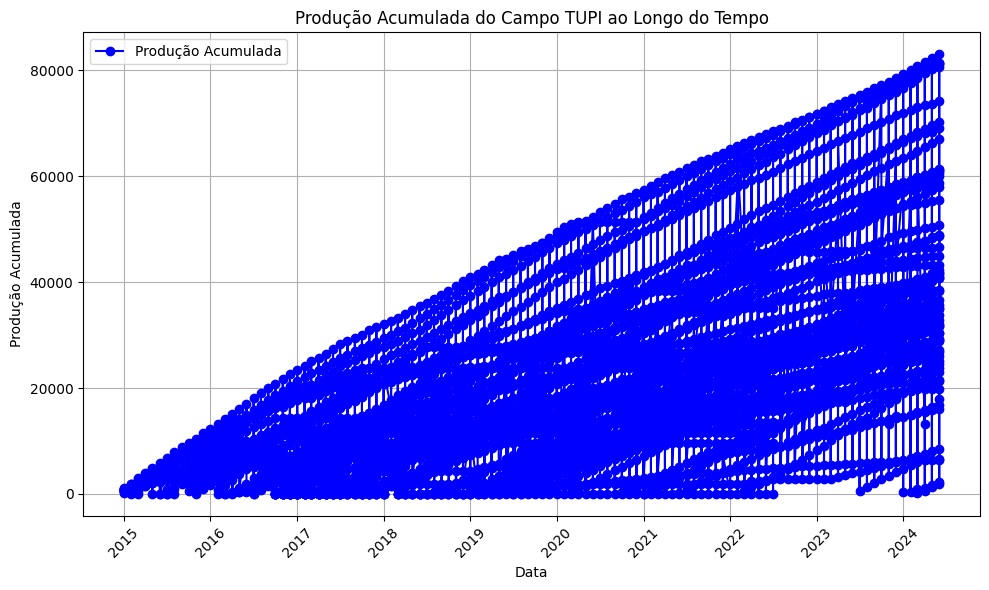

Data de corte para o treino: 2024-03-01 00:00:00


In [34]:
# Filtrando os dados para o campo TUPI
df_tupi = df_prod[df_prod['campo'] == 'TUPI']

# Verificando os primeiros dados do campo TUPI
display(df_tupi)

# Plotando a produção acumulada ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_tupi['periodo'], df_tupi['producao_acumulada'], marker='o', color='b', label='Produção Acumulada')

# Adicionando título e rótulos
plt.title('Produção Acumulada do Campo TUPI ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Verificando a data de corte
data_corte = df_tupi['periodo'].max() - pd.DateOffset(months=3)
print(f'Data de corte para o treino: {data_corte}')

# Verificando se o valor de 2024 está antes ou depois da data de corte
df_2024 = df_tupi[df_tupi['periodo'].dt.year == 2024]

,periodo,campo,producao_acumulada,oleo_kbd
12,2015-01-01,TUPI,8.604215e+03,277.555322
26,2015-02-01,TUPI,1.608757e+04,267.262673
39,2015-03-01,TUPI,2.500400e+04,288.070143
55,2015-04-01,TUPI,3.263363e+04,307.597181
72,2015-05-01,TUPI,4.189024e+04,298.600157
...,...,...,...,...
2639,2024-02-01,TUPI,2.367440e+06,744.677291
2671,2024-03-01,TUPI,2.422633e+06,787.704040
2703,2024-04-01,TUPI,2.399344e+06,722.729380
2735,2024-05-01,TUPI,2.461982e+06,755.464600


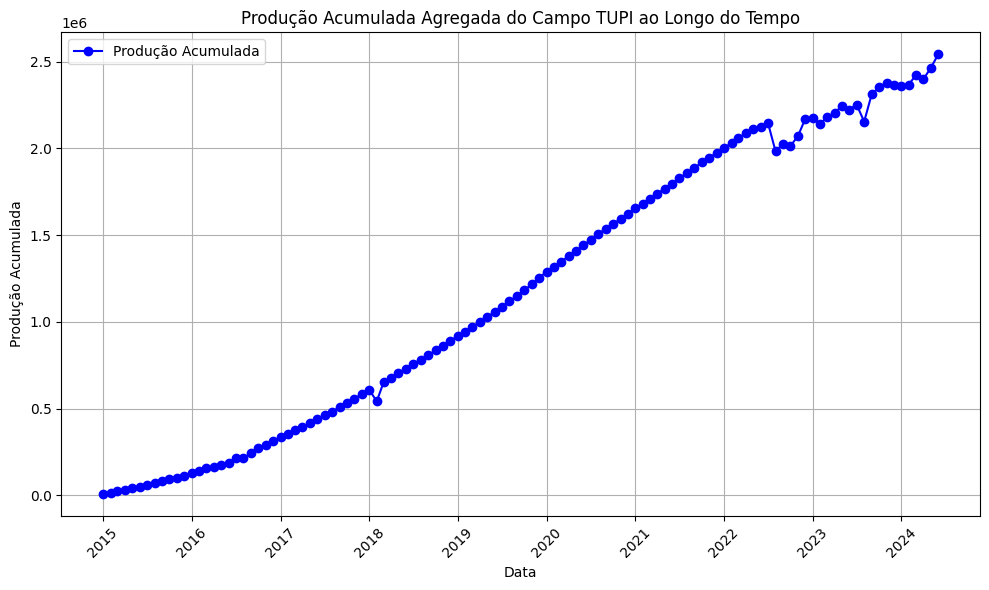

Mean Squared Error: 1536474544068.125
Produção prevista para o próximo mês: -768909.3893873083


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Agregar os dados por 'periodo' e 'campo', somando as colunas relevantes
df_agregado = df_prod.groupby(['periodo', 'campo'], as_index=False).agg({
    'producao_acumulada': 'sum',  # Somar a produção acumulada
    'oleo_kbd': 'sum'             # Somar a produção de óleo
})

# Filtrar os dados para o campo de interesse (TUPI)
campo_especifico = 'TUPI'
df_tupi_agregado = df_agregado[df_agregado['campo'] == campo_especifico]

# Visualizando os dados agregados do campo TUPI
display(df_tupi_agregado)

# Plotando a produção acumulada agregada ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_tupi_agregado['periodo'], df_tupi_agregado['producao_acumulada'], marker='o', color='b', label='Produção Acumulada')

# Adicionando título e rótulos
plt.title('Produção Acumulada Agregada do Campo TUPI ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Definindo features e target
features = ['oleo_kbd']
target = 'producao_acumulada'

# Dividir os dados em treino e validação, garantindo que a sequência temporal seja mantida
X = df_tupi_agregado[features]
y = df_tupi_agregado[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)  # Não embaralhar para manter a sequência temporal

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever a produção no conjunto de validação
y_pred = model.predict(X_val)

# Avaliar o modelo
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

# Exemplo de previsão para o próximo mês (ajustando o valor de 'oleo_kbd')
novo_mes = {'oleo_kbd': 0.85}  # Aqui você ajusta o valor de 'oleo_kbd' para o próximo mês
X_novo_mes = pd.DataFrame([novo_mes])

# Prever a produção acumulada para o próximo mês
producao_prevista = model.predict(X_novo_mes)
print(f'Produção prevista para o próximo mês: {producao_prevista[0]}')
